In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
xls = pd.ExcelFile('Новый диплом датасет.xlsx')
dfd = pd.read_excel(xls, 'Данные').fillna(0)
dfc = pd.read_excel(xls, 'Clients').fillna(0)
dfr = pd.read_excel(xls, 'Region_dict').fillna(0)

In [3]:
dfrc = dfr.groupby('city').count().reset_index().sort_values('id_trading_point', ascending = False)

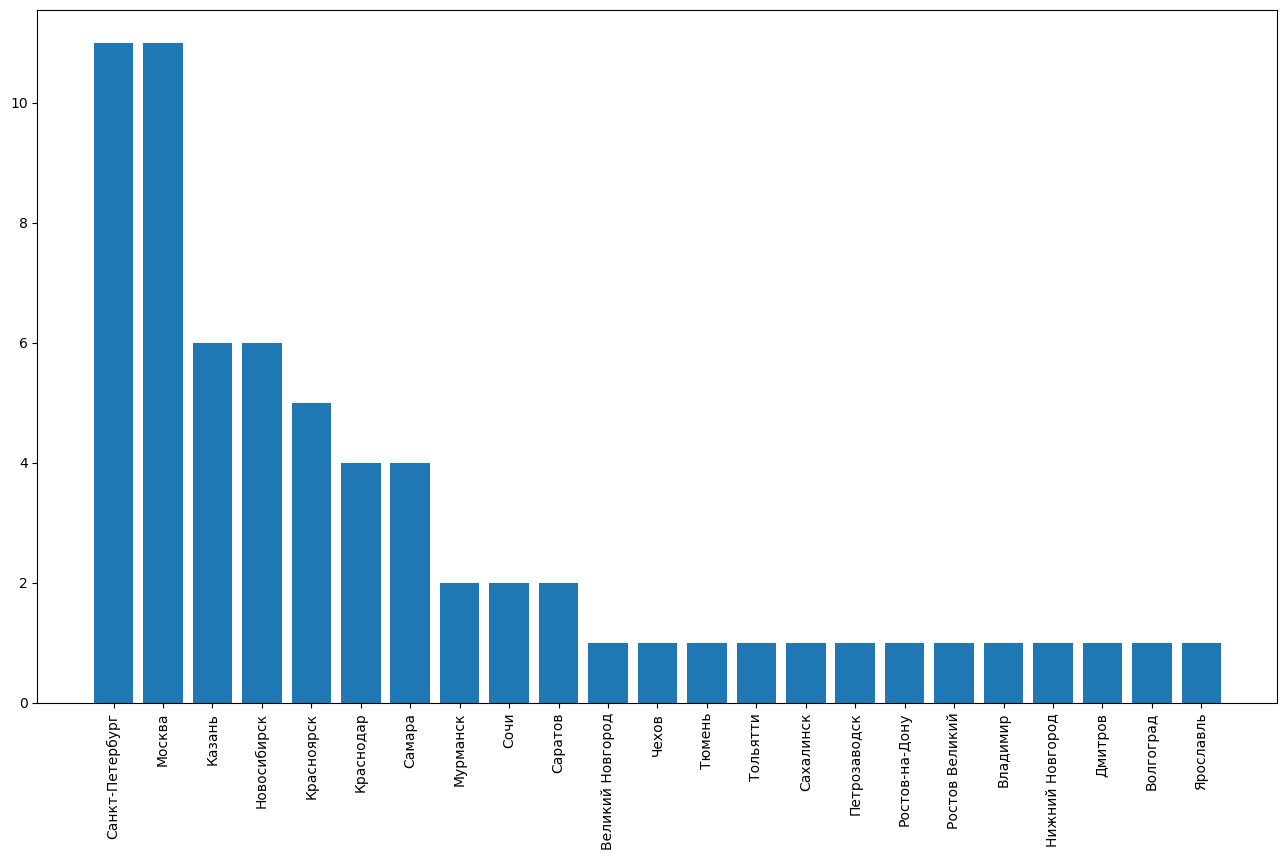

In [4]:
plt.figure(figsize=(16,9))
plt.bar(dfrc['city'], dfrc['id_trading_point'])
plt.xticks(rotation=90)
plt.show()

In [5]:
dfds = dfd.groupby('id_client').agg({'amt_payment':'sum'}).reset_index()
dfds['id_client'] = dfds['id_client'].astype(int)

In [6]:
dfa = pd.merge(dfc, dfds, how = 'left').fillna(0)
dfa = pd.merge(dfa, dfr, how = 'left')
dfa['payment_flag'] = np.where(dfa['amt_payment'] > 0, 1,0)

In [7]:
def test_calc(x, y, alpha = 0.05):
    t1, t2 = ttest_ind(x,y)
    if t2 > alpha:
        print('Разницы между средними не выявлено')
    else:
        print('Разница между средними выявлена')

In [8]:
def mann_whitney_func(x, y, a = 0.05):
    st, pv = stats.mannwhitneyu(x, y, alternative = 'two-sided',nan_policy = 'omit')
    if pv > a:
        print('Разница между распределениями не выявлена')
    else:
        print('Разница между распределениями выявлена')
    return print('Статистика Манна Уитни:', st, '\npvalue Манна Уитни:', pv)

In [9]:
empt_lst = []
for i in dfa['id_trading_point'].unique():
    sum_c = dfa[(dfa['id_trading_point']==i)&(dfa['nflag_test']==0)]['amt_payment'].sum()
    sum_t = dfa[(dfa['id_trading_point']==i)&(dfa['nflag_test']==1)]['amt_payment'].sum()
    if (sum_c == 0)|(sum_t == 0):
        empt_lst.append(i)

In [10]:
empt_lst

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 4, 1]

In [11]:
no_client_lst = []
for i in dfa['id_trading_point'].unique():
    sum_c = dfa[(dfa['id_trading_point']==i)&(dfa['nflag_test']==0)].count()['id_client']
    sum_t = dfa[(dfa['id_trading_point']==i)&(dfa['nflag_test']==1)].count()['id_client']
    if (sum_c == 0)|(sum_t == 0):
        no_client_lst.append(i)

In [12]:
no_client_lst

[1015, 866, 1099, 739, 228, 603, 810, 800]

In [13]:
dfn = dfa[~dfa['id_trading_point'].isin(empt_lst)]
#без пустых значений

<Axes: xlabel='amt_payment', ylabel='Count'>

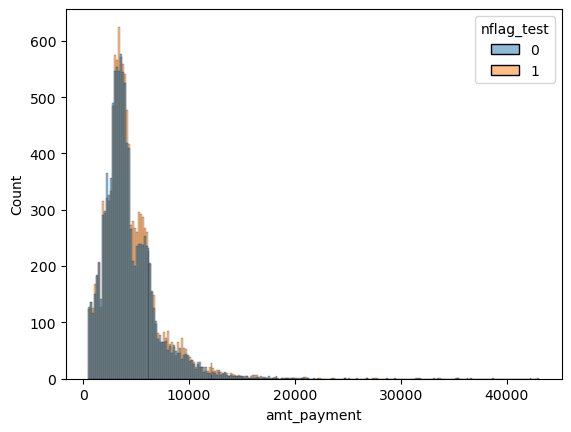

In [14]:
sns.histplot(dfn[dfn['amt_payment']>0], x = 'amt_payment', hue = 'nflag_test')

In [15]:
test_calc(dfn[dfn['nflag_test'] == 1]['amt_payment'],dfn[dfn['nflag_test'] == 0]['amt_payment'])

Разница между средними выявлена


In [16]:
test_calc(dfn[dfn['nflag_test'] == 1]['payment_flag'],dfn[dfn['nflag_test'] == 0]['payment_flag'])

Разница между средними выявлена


In [17]:
mann_whitney_func(dfn[dfn['nflag_test'] == 1]['amt_payment'],dfn[dfn['nflag_test'] == 0]['amt_payment'])

Разница между распределениями выявлена
Статистика Манна Уитни: 276128220.5 
pvalue Манна Уитни: 6.4266200670011766e-24


In [18]:
mann_whitney_func(dfn[dfn['nflag_test'] == 1]['payment_flag'],dfn[dfn['nflag_test'] == 0]['payment_flag'])

Разница между распределениями выявлена
Статистика Манна Уитни: 273872776.5 
pvalue Манна Уитни: 5.52090068118868e-20


Москва

In [19]:
test_calc(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Москва')]['amt_payment'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Москва')]['amt_payment'])

Разница между средними выявлена


In [20]:
test_calc(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Москва')]['payment_flag'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Москва')]['payment_flag'])

Разница между средними выявлена


In [21]:
mann_whitney_func(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Москва')]['amt_payment'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Москва')]['amt_payment'])

Разница между распределениями выявлена
Статистика Манна Уитни: 20643197.5 
pvalue Манна Уитни: 8.651256576787724e-17


In [22]:
mann_whitney_func(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Москва')]['payment_flag'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Москва')]['payment_flag'])

Разница между распределениями выявлена
Статистика Манна Уитни: 20190393.0 
pvalue Манна Уитни: 1.3888194541373183e-10


Санкт-Петербург

In [23]:
test_calc(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Санкт-Петербург')]['amt_payment'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Санкт-Петербург')]['amt_payment'])

Разница между средними выявлена


In [24]:
test_calc(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Санкт-Петербург')]['payment_flag'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Санкт-Петербург')]['payment_flag'])

Разница между средними выявлена


In [25]:
mann_whitney_func(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Санкт-Петербург')]['amt_payment'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Санкт-Петербург')]['amt_payment'])

Разница между распределениями выявлена
Статистика Манна Уитни: 10899685.5 
pvalue Манна Уитни: 2.0392184217953754e-20


In [26]:
mann_whitney_func(dfn[(dfn['nflag_test'] == 1)&(dfn['city']=='Санкт-Петербург')]['payment_flag'],dfn[(dfn['nflag_test'] == 0)&(dfn['city']=='Санкт-Петербург')]['payment_flag'])

Разница между распределениями выявлена
Статистика Манна Уитни: 10827979.0 
pvalue Манна Уитни: 1.3118606823466691e-20


In [27]:
dfendt = pd.DataFrame()
dfendt['city'] = dfr['city']
dfendt['id_trading_point'] = dfr['id_trading_point']

In [28]:
dfendt = dfendt[~dfendt['id_trading_point'].isin(empt_lst)]

In [29]:
cntt = []
cntc = []
for i in dfendt['id_trading_point']:
    cntt.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 1)]['id_client'].count())
    cntc.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 0)]['id_client'].count())
dfendt['count_test'] = cntt
dfendt['count_control'] = cntc

In [30]:
dfendt['count_all'] = dfendt['count_test'] + dfendt['count_control']
dfendt['percent_count'] = round(dfendt['count_all'] / dfn['id_client'].count(), 4)

In [31]:
avgt = []
avgc = []
for i in dfendt['id_trading_point']:
    avgt.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 1)]['amt_payment'].mean())
    avgc.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 0)]['amt_payment'].mean())
dfendt['avg_payment_test'] = avgt
dfendt['avg_payment_control'] = avgc

In [32]:
dfendt['diff'] = dfendt['avg_payment_test'] - dfendt['avg_payment_control']

In [33]:
stdt = []
stdc = []
for i in dfendt['id_trading_point']:
    stdt.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 1)]['amt_payment'].std())
    stdc.append(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 0)]['amt_payment'].std())
dfendt['sigma_test'] = stdt
dfendt['sigma_control'] = stdc

In [34]:
ttest = []
pvalue = []
for i in dfendt['id_trading_point']:
    p, v = ttest_ind(dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 1)]['amt_payment'],dfn[(dfn['id_trading_point'] == i)&(dfn['nflag_test'] == 0)]['amt_payment'])
    ttest.append(round(p, 4))
    pvalue.append(round(v, 4))
dfendt['ttest'] = ttest
dfendt['pvalue_ttest'] = pvalue

In [35]:
flag = []
for i in dfendt['id_trading_point']:
    if dfendt[dfendt['id_trading_point'] == i]['pvalue_ttest'].sum() > 0.05:
        flag.append(0)
    elif dfendt[dfendt['id_trading_point'] == i]['diff'].sum() > 0:
        flag.append(1)
    else:
        flag.append(2)
dfendt['group_flag'] = flag

In [36]:
dfendt.to_excel('raw.xlsx')

In [37]:
dfendt

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,group_flag
1,Дмитров,2,78,71,149,0.0033,579.333333,483.450704,95.882629,1860.762430,1654.923182,0.3311,0.7411,0
4,Владимир,11,509,608,1117,0.0244,2547.220039,2108.610197,438.609842,3023.702164,2663.038392,2.5770,0.0101,1
5,Нижний Новгород,13,142,150,292,0.0064,1970.549296,2336.186667,-365.637371,2575.944761,2709.895464,-1.1804,0.2388,0
6,Тюмень,19,130,146,276,0.0060,2043.823077,1743.376712,300.446365,2442.266788,2891.333359,0.9265,0.3550,0
7,Великий Новгород,23,124,107,231,0.0050,1384.629032,1315.981308,68.647724,2471.691776,2220.010713,0.2206,0.8256,0
9,Самара,33,232,258,490,0.0107,4598.219828,2311.387597,2286.832231,2931.234926,2371.771296,9.5328,0.0000,1
10,Самара,34,225,253,478,0.0104,3104.506667,1752.608696,1351.897971,2956.826915,2529.700798,5.3863,0.0000,1
11,Самара,35,214,194,408,0.0089,2762.224299,1508.835052,1253.389248,2977.083547,2184.808094,4.8067,0.0000,1
12,Самара,36,131,141,272,0.0059,1987.328244,860.418440,1126.909805,2718.502663,1840.826639,4.0280,0.0001,1
14,Мурманск,54,633,640,1273,0.0278,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.0976,0.9223,0
